In [34]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from matplotlib import animation

In [35]:
N = 21
o = (N - 1)//2


In [36]:
def initial_coloring():
    im.set_data(data)
    return im
    
    

In [37]:
def plot_data():
    # create discrete colormap
   

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap=cmap, norm=norm)

    # draw gridlines
#     ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#     ax.set_xticks(np.arange(0, N+1, 1));
#     ax.set_yticks(np.arange(0, N+1, 1));

    plt.show()

In [38]:
def number_of_colored(x,y):
    s = 0
    if data[x,y] < 11:
        for i in [-1,0,1]:
            for j in [-1,0,1]:
                    if data[x+i, y+j] == 15:
                        s = s+1
    return (s >= 3)
    

In [39]:
def etape_suivante(itera):
    global totalC
    global step
    new = 0
    if data[o,o] > 11:
        for x in range(1,N):
            for y in range(1,N):
                if number_of_colored(x,y):
                    new += 1
                    data[x,y] = 14
        for x in range(N+1):
            for y in range(N+1):
                if data[x,y] > 10:
                    data[x,y] = 15
    else:
        data[o, o] = 15
        data[o + 1, o] = 15
        data[o - 1, o] = 15
        data[o, o + 1] = 15
        data[o, o - 1] = 15
        new = 5
    step += 1
    im.set_data(data)
    totalC += new
    ax.annotate(
        text = 'Number of colored squares: {0}\n Step: {1}'.format(totalC, step), 
        xy=(0, 0), 
        xytext=(0, 0), 
        va='top',
        ha='left',
        fontsize = 10,
        bbox=dict(facecolor='white', alpha=1),
    )
    

    return im
            

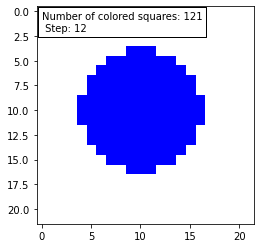

In [40]:
data = np.zeros((N+1, N+1))
totalC = 0
step = 0

cmap = colors.ListedColormap(['white', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap=cmap, norm=norm)



anim = animation.FuncAnimation(fig, etape_suivante, init_func=initial_coloring, interval=500, save_count=12)

from IPython.display import HTML
HTML(anim.to_jshtml())